# Scratch

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib import rc
import matplotlib.font_manager
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=22)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

import matplotlib as mpl
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'

In [2]:
import numpy as np
from scipy import stats
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [3]:
from utils.losses import *
from utils.training import *
import os

In [4]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

2022-10-13 07:33:06.120575: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-10-13 07:33:06.145551: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: Quadro RTX 6000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 23.65GiB deviceMemoryBandwidth: 625.94GiB/s
2022-10-13 07:33:06.146879: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-10-13 07:33:06.171050: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-10-13 07:33:06.184337: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-10-13 07:33:06.187157: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2

# Basic Model

We are considering models of the form $\phi(ax + b)$. 

## $A/B$ Parametrization

In [7]:
# Experiment parameters
num = 0    # bkgd: normal(-0.1, 1)     sgnl: normal(0.1, 1)
reps = 20

# File parameters
dirstr = 'models/univariate/simple/ab_mse/set_{}/'.format(num)
filestr = dirstr + 'model_{}_{}.h5'

if not os.path.isdir(dirstr):
    os.mkdir(dirstr)

# Data parameters
N = 10**6
X = np.load('data/normal/0.1/X_trn.npy')[:N]
y = np.load('data/normal/0.1/y_trn.npy')[:N]
data, m, s = split_data(X, y)
ps = np.round(np.linspace(-2, 2, 101), 2)

In [8]:
# Train models
for p in ps[ps >= -1.2]:
    print('===================================================\n{}'.format(p))
    params = {'loss': get_mse(p)}
    for i in range(reps):
        print(i, end = '\t')
        model, trace = train(data, **params)
        model.save_weights(filestr.format(p, i))

-1.2
0	

2022-08-10 14:31:28.414438: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-08-10 14:31:28.422106: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2994530000 Hz
2022-08-10 14:31:28.423567: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55a08007d520 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-08-10 14:31:28.423597: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-08-10 14:31:28.563474: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55a0800e7340 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-08-10 14:31:28.563547: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 6000, Compute Capability 7.5
2022-08-10 14:31:28.565161: I 

2.694949150085449 	 100	-0.77236265 	 0.0010443691
1	2.3300275802612305 	 100	0.13382892 	 0.000996301
2	2.3070995807647705 	 100	-0.24130069 	 0.00059385254
3	2.305302858352661 	 100	0.04520991 	 0.0001631613
4	3.0917766094207764 	 100	-0.98984176 	 0.0014063108
5	4.08527135848999 	 100	1.1047785 	 0.001390738
6	2.351705551147461 	 100	-0.37590757 	 0.00045087724
7	2.5399277210235596 	 100	-0.642218 	 0.0010516539
8	3.039046049118042 	 100	-0.9666372 	 0.001840028
9	2.308241605758667 	 100	0.058579907 	 0.00043656636
10	2.290814161300659 	 100	-0.09338165 	 0.0013271864
11	2.2910728454589844 	 100	-0.11263418 	 0.0011652937
12	3.1861252784729004 	 100	-1.0284059 	 0.0017507346
13	2.2908170223236084 	 19	-0.0917187 	 0.0006770714
14	2.290818691253662 	 45	-0.094080456 	 0.00040422368
15	2.290818929672241 	 25	-0.091730736 	 -0.00025485686
16	2.345508098602295 	 100	-0.36154884 	 0.00066405605
17	2.797492504119873 	 100	0.65665954 	 0.0009083742
18	2.2908198833465576 	 34	-0.09292723 	 

# Multivariates

In [5]:
x = np.linspace(-2, 2, 201)
y = np.linspace(-2, 2, 201)
xx, yy = np.meshgrid(x, y)

pos = np.empty(xx.shape + (2,))
pos[:, :, 0] = xx; pos[:, :, 1] = yy

In [6]:
N = 4000

g = np.meshgrid(np.linspace(-2, 2, N + 1), np.linspace(-2, 2, N + 1))
g = np.append(g[0].reshape(-1, 1), g[1].reshape(-1, 1), axis = 1)

aa, bb = np.meshgrid(np.linspace(-2.005, 2.005, N + 2), np.linspace(-2.005, 2.005, N + 2))

## Test 0

In [18]:
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

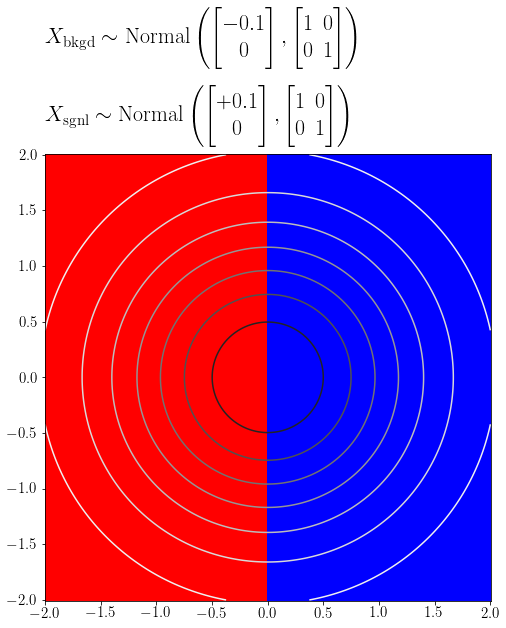

In [19]:
plt.figure(figsize = (8, 10))
#plt.text(-2, 3, r'$X_{\rm bkgd} \sim \text{Normal}\left( \begin{bmatrix} -0.1 \\ 0 \end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \right)$');
#plt.text(-2, 2.3, r'$X_{\rm sgnl} \sim \text{Normal}\left( \begin{bmatrix} +0.1 \\ 0 \end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \right)$');

plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)), colors='white')

zz = np.zeros((N + 1)**2)
zz[sgnl.pdf(g) / bkgd.pdf(g) <= 1] = 1
zz[sgnl.pdf(g) / bkgd.pdf(g) > 1] = -1
plt.pcolormesh(aa, bb, zz.reshape(N + 1, N + 1), cmap = 'bwr')

plt.gca().set_aspect('equal')
plt.savefig('plots/multivariate/scratch/mvn_0.png', 
            dpi = 300, 
            transparent = True, 
            bbox_inches = 'tight')

## Test 1

In [10]:
b = 0.1 / (2 ** (0.5))
mu_bkgd = np.array([-b, b])
mu_sgnl = np.array([b, -b])
sg_bkgd = np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

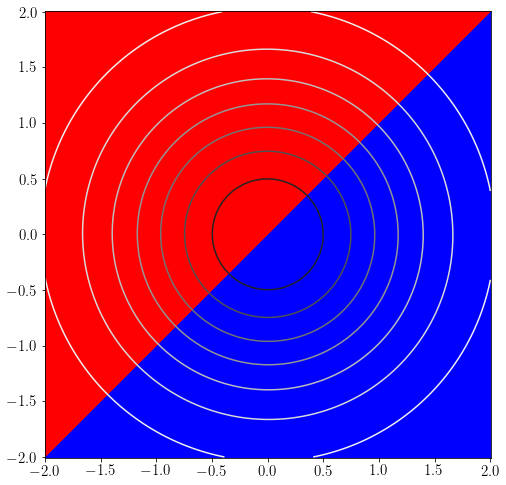

In [11]:
plt.figure(figsize = (8, 10))
#plt.text(-2, 3, r'$X_{\rm bkgd} \sim \text{Normal}\left( \begin{bmatrix} -\frac{0.1}{\sqrt{2}} \\ +\frac{0.1}{\sqrt{2}} \end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \right)$');
#plt.text(-2, 2.3, r'$X_{\rm sgnl} \sim \text{Normal}\left( \begin{bmatrix} +\frac{0.1}{\sqrt{2}} \\ -\frac{0.1}{\sqrt{2}} \end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \right)$');

plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)), colors='white')

zz = np.zeros((N + 1)**2)
zz[sgnl.pdf(g) / bkgd.pdf(g) <= 1] = 1
zz[sgnl.pdf(g) / bkgd.pdf(g) > 1] = -1

plt.pcolormesh(aa, bb, zz.reshape(N + 1, N + 1), cmap = 'bwr')
plt.gca().set_aspect('equal')
plt.savefig('plots/multivariate/scratch/mvn_1_2.png', 
            dpi = 300, 
            transparent = True, 
            bbox_inches = 'tight')

## Test 2

In [12]:
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = 2*np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

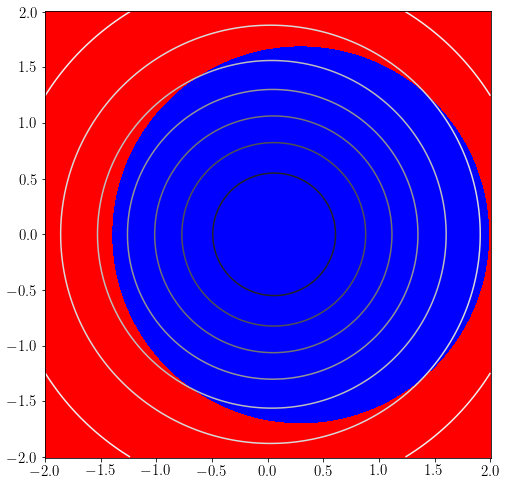

In [13]:
plt.figure(figsize = (8, 10))
#plt.text(-2, 3, r'$X_{\rm bkgd} \sim \text{Normal}\left( \begin{bmatrix} -0.1 \\ 0 \end{bmatrix}, \begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix} \right)$');
#plt.text(-2, 2.3, r'$X_{\rm sgnl} \sim \text{Normal}\left( \begin{bmatrix} +0.1 \\ 0 \end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \right)$');

plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)), colors='white')

zz = np.zeros((N + 1)**2)
zz[sgnl.pdf(g) / bkgd.pdf(g) <= 1] = 1
zz[sgnl.pdf(g) / bkgd.pdf(g) > 1] = -1

plt.pcolormesh(aa, bb, zz.reshape(N + 1, N + 1), cmap = 'bwr')
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/mvn_2_2.png', 
            dpi = 300, 
            transparent = True, 
            bbox_inches = 'tight')

## Test 3

In [14]:
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0], [0, 1]])
sg_sgnl = np.array([[1, 0], [0, 2]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

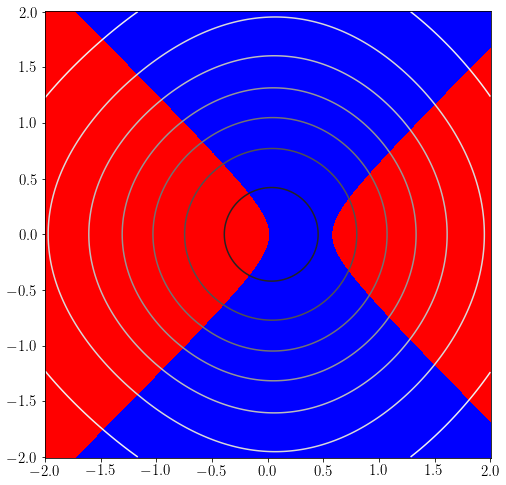

In [15]:
plt.figure(figsize = (8, 10))
#plt.text(-2, 3, r'$X_{\rm bkgd} \sim \text{Normal}\left( \begin{bmatrix} -0.1 \\ 0 \end{bmatrix}, \begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix} \right)$');
#plt.text(-2, 2.3, r'$X_{\rm sgnl} \sim \text{Normal}\left( \begin{bmatrix} +0.1 \\ 0 \end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 2 \end{bmatrix} \right)$');

plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)), colors='white')

zz = np.zeros((N + 1)**2)
zz[sgnl.pdf(g) / bkgd.pdf(g) <= 1] = 1
zz[sgnl.pdf(g) / bkgd.pdf(g) > 1] = -1

plt.pcolormesh(aa, bb, zz.reshape(N + 1, N + 1), cmap = 'bwr')
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/mvn_3_2.png', 
            dpi = 300, 
            transparent = True, 
            bbox_inches = 'tight')

## Test 4

In [16]:
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0.25], [0.25, 1]])
sg_sgnl = np.array([[2, -0.25], [-0.25, 1]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

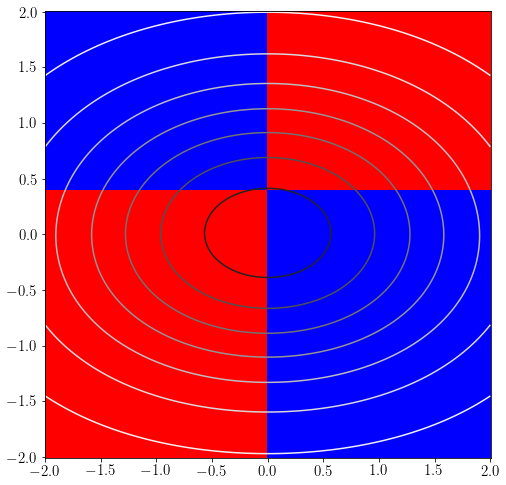

In [17]:
plt.figure(figsize = (8, 10))
#plt.text(-2, 3, r'$X_{\rm bkgd} \sim \text{Normal}\left( \begin{bmatrix} -0.1 \\ 0 \end{bmatrix}, \begin{bmatrix} 2 & \frac{1}{4} \\ \frac{1}{4} & 1 \end{bmatrix} \right)$');
#plt.text(-2, 2.3, r'$X_{\rm sgnl} \sim \text{Normal}\left( \begin{bmatrix} +0.1 \\ 0 \end{bmatrix}, \begin{bmatrix} 2 & -\frac{1}{4} \\ -\frac{1}{4} & 1 \end{bmatrix} \right)$');

plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)), colors='white')

zz = np.zeros((N + 1)**2)
zz[sgnl.pdf(g) / bkgd.pdf(g) <= 1] = 1
zz[sgnl.pdf(g) / bkgd.pdf(g) > 1] = -1

plt.pcolormesh(aa, bb, zz.reshape(N + 1, N + 1), cmap = 'bwr')
plt.gca().set_aspect('equal')
plt.savefig('plots/multivariate/scratch/mvn_4_2.png', 
            dpi = 300, 
            transparent = True, 
            bbox_inches = 'tight')

# Old

In [ ]:
1/0

In [ ]:
u = stats.multivariate_normal([-3, 0], [[4, 0], [0, 1]])
v = stats.multivariate_normal([3, 0], [[1, 0], [0, 4]])

In [ ]:
plt.contour(xx, yy, 0.5 * (u.pdf(pos) + v.pdf(pos)))
cc = pos[u.pdf(pos) / v.pdf(pos) < 1]
dd = pos[u.pdf(pos) / v.pdf(pos) > 1]
plt.scatter(cc[:, 0], cc[:, 1], c = 'red')
plt.scatter(dd[:, 0], dd[:, 1], c = 'blue')
#ee = pos[(u.pdf(pos) / v.pdf(pos) <= 1.1) & (u.pdf(pos) / v.pdf(pos) >= 0.9)]
#plt.scatter(dd[:, 0], dd[:, 1], c = 'blue', s = .01)
plt.gca().set_aspect('equal')